In [1]:
!pip install -qq git+https://github.com/creative-graphic-design/TKG-DM

ERROR: Package 'tkg-dm' requires a different Python: 3.10.12 not in '>=3.11'


In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
from tkg_dm.pipelines import TKGStableDiffusionPipeline
from diffusers import DDIMScheduler

model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

scheduler = DDIMScheduler.from_pretrained(
    model_id, 
    subfolder="scheduler"
)

pipe = TKGStableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.bfloat16,
    safety_checker=None,
)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'tkg_dm.pipelines.pipeline_stable_diffusion.TKGStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [4]:
base_prompts = [
    "young woman with virtual reality glasses sitting in armchair",
    "yellow lemon and slice",
    "gray cat british short hair",
    "vintage golden trumpet making music concept",
    "set of many business people",
]

active_prompt = "realistic, photo-realistic, 4K, high resolution, high quality"

negative_prompt = "background, character, cartoon, anime, text, fail, low resolution"

In [5]:
prompts = [f"{prompt}, {active_prompt}" for prompt in base_prompts]
prompts

['young woman with virtual reality glasses sitting in armchair, realistic, photo-realistic, 4K, high resolution, high quality',
 'yellow lemon and slice, realistic, photo-realistic, 4K, high resolution, high quality',
 'gray cat british short hair, realistic, photo-realistic, 4K, high resolution, high quality',
 'vintage golden trumpet making music concept, realistic, photo-realistic, 4K, high resolution, high quality',
 'set of many business people, realistic, photo-realistic, 4K, high resolution, high quality']

In [6]:
output = pipe(
    prompt=prompts, 
    negative_prompt=[negative_prompt] * len(base_prompts),
    generator=torch.manual_seed(19950815),
)
images = output.images

  0%|          | 0/50 [00:00<?, ?it/s]

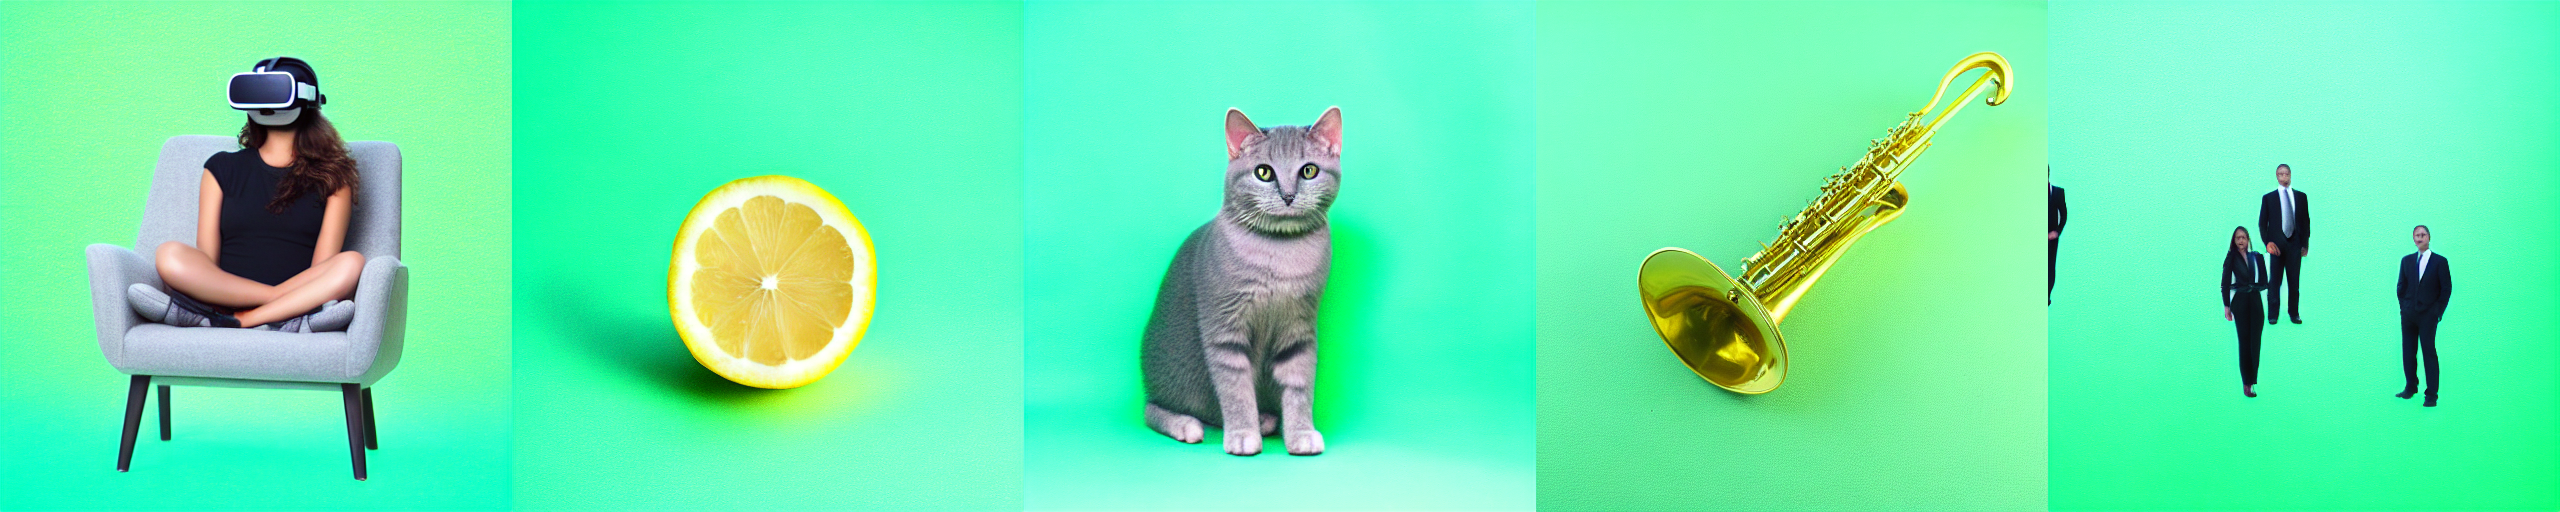

In [7]:
from diffusers.utils import make_image_grid

make_image_grid(images, rows=1, cols=len(images))